# Football Probabilities in Python

## Overview
In May 2009,
[Professor David Spiegelhalter](https://en.wikipedia.org/wiki/David_Spiegelhalter)
the Professor for the Understanding of Risk at Cambridge University wrote
[an article](http://news.bbc.co.uk/1/hi/programmes/more_or_less/8062277.stm)
for the BBC concerning the probable outcomes for that last matches of that Premiership football games. This article added to another that he had published called
[One game to play!](https://understandinguncertainty.org/node/228)
which gives a bit more detail on how some of the figures were calculated.

In this Jupyter notebook, we are going to look at implementing some of the mathematical equations for that article in Python using the
[Numpy](https://numpy.org/) and
[SciPy](https://www.scipy.org/)
packages.

## Methods
The article describes the attack strengh/defence weakness method (which is also described in
[How to calculate Poisson distribution for football betting](https://help.smarkets.com/hc/en-gb/articles/115001457989-How-to-calculate-Poisson-distribution-for-football-betting))
and concentrates on the game between Arsenal and Stoke City which was played at the Emirates Stadium on Sunday 24th May at 1600 BST.

Looking at how the 
[league table](https://en.wikipedia.org/wiki/2008%E2%80%9309_Premier_League#League_table)
looked at the end of the season and subtracting the goals that we now know Arsenal and Stoke scored, we can setup some variables and check them against the initial values in the article.



In [1]:
# Enable PEP8 code checking.
%load_ext pycodestyle_magic

%pycodestyle_on

In [4]:
import footy

f = footy.Footy()

f.add_team('Arsenal', 64, 36, 18, 19)
f.add_team('Aston Villa', 53, 48, 18, 19)
f.add_team('Blackburn', 40, 60, 18, 19)
f.add_team('Bolton', 41, 52, 19, 18)
f.add_team('Chelsea', 65, 22, 19, 18)
f.add_team('Everton', 53, 37, 19, 18)
f.add_team('Fulham', 39, 32, 18, 19)
f.add_team('Hull', 39, 63, 18, 19)
f.add_team('Liverpool', 74, 26, 18, 19)
f.add_team('Man City', 57, 50, 18, 19)
f.add_team('Man United', 67, 24, 19, 18)
f.add_team('Middlesbrough', 27, 55, 19, 18)
f.add_team('Newcastle', 40, 58, 19, 18)
f.add_team('Portsmouth', 38, 56, 19, 18)
f.add_team('Stoke', 37, 51, 19, 18)
f.add_team('Sunderland', 32, 51, 18, 19)
f.add_team('Tottenham', 44, 42, 19, 18)
f.add_team('West Brom', 36, 67, 19, 18)
f.add_team('West Ham', 40, 44, 18, 19)
f.add_team('Wigan', 33, 45, 18, 19)

f.dataframe()

team_name  goals_for  goals_against  home_games  away_games  \
0         Arsenal         64             36          18          19   
1     Aston Villa         53             48          18          19   
2       Blackburn         40             60          18          19   
3          Bolton         41             52          19          18   
4         Chelsea         65             22          19          18   
5         Everton         53             37          19          18   
6          Fulham         39             32          18          19   
7            Hull         39             63          18          19   
8       Liverpool         74             26          18          19   
9        Man City         57             50          18          19   
10     Man United         67             24          19          18   
11  Middlesbrough         27             55          19          18   
12      Newcastle         40             58          19          18   
13     Portsmouth         38             56          19          18   
14          Stoke         37             51          19          18   
15     Sunderland         32             51          18          19   
16      Tottenham         44             42          19          18   
17      West Brom         36             67          19          18   
18       West Ham         40             44          18          19   
19          Wigan         33             45          18          19   

    attack_strength  defence_factor  
0              1.39            0.78  
1              1.15            1.04  
2              0.87            1.30  
3              0.89            1.13  
4              1.41            0.48  
5              1.15            0.80  
6              0.85            0.70  
7              0.85            1.37  
8              1.61            0.57  
9              1.24            1.09  
10             1.46            0.52  
11             0.59            1.20  
12             0.87            1.26  
13             0.83            1.22  
14             0.80            1.11  
15             0.70            1.11  
16             0.96            0.91  
17             0.78            1.46  
18             0.87            0.96  
19             0.72            0.98

The article says that Arsenal has a strong (greater than 1) attack strengh of 39% (shown as 1.39 here). Stoke City has a weak (greater than 1) defence factor of 11% (shown as 1.11 here). So our figures match the article.

We also need two other pieces of information: the average number of goals scored by a home team is 1.36, while for an away team it's 1.06. So using that, let us predict the probably outcome of the Arsenal v Stoke City game.

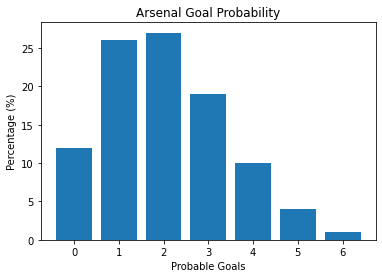

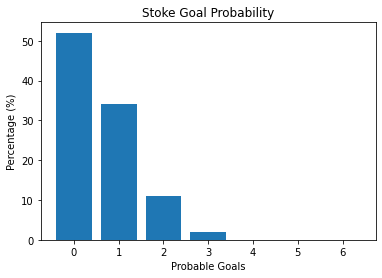

home  away  probability
0     2     0        14.04
1     1     0        13.52
2     3     0         9.88
3     2     1         9.18
4     1     1         8.84

In [5]:
f.average_goals_scored((1.36, 1.06))
f.score_probability('Arsenal', 'Stoke').head()

This confirms that Arsenal had a 27% chance of scoring 2 goals and Stoke had a 51% chance of scoring no goals. That the most likely score is 2-0 (14% probability) followed by 1-0 and 3-0 (13.52% and 9.88% respectively).

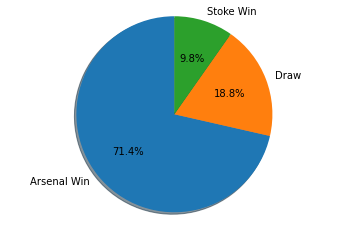

(70.02, 18.43, 9.56)

In [6]:
f.outcome_probability('Arsenal', 'Stoke')

The probable outcome also matches what was in the article.

## Conclusion

Arsenal went on to win the game 4-1, so the probable outcome was correct, but the probable score of 2-0 was not.